# Overview

In this notebook, we will walk through the process of using a pre-trained audio transformers for audio classification tasks. We will fine-tuned a transformer model to perform **music genre classification**, where our model receives a music recording as input and labels it as geners like pop or rock.

Before we starting, let's learn what these files actaully contain, and how to work with them. Some terms like:

* waveform
* sampling rate
* spectrogram

Note: It is important to ensure that all audio examples in the dataset have the same sampling rate when working on any audio task. And the sampling rate of the data should match the sampling rate of the data the model was pre-trained on if not we need to do the **resampling** process.

The **sampling rate** determines the time interval between successive audio samples, which impacts the temporal resolution of the audio data. For example, a 5-second sound at a sampling rate of 16,000 Hz will be represented as a series of 80,000 values.

The **amplitude** of a sound describes the sound pressure level at any given instant and is measured in decibels(dB). Teh **bit depth** of the sample determines with how much precision this amplitude value can be described.


# Audio as a waveform

We can plot the sample values over time and illustrates the chnages in the sound's amplitude. This is also known as the `time domain` representation of sound. This type of visualization is useful for identifying specific features of the audio signal such as the timing of individual sound events, the overall loudness of the signal, and any irregularities or noise present in the audio.

In [1]:
%%capture
!pip install librosa==0.10.1

In [2]:
import librosa

array, sampling_rate = librosa.load(librosa.ex('trumpet'))

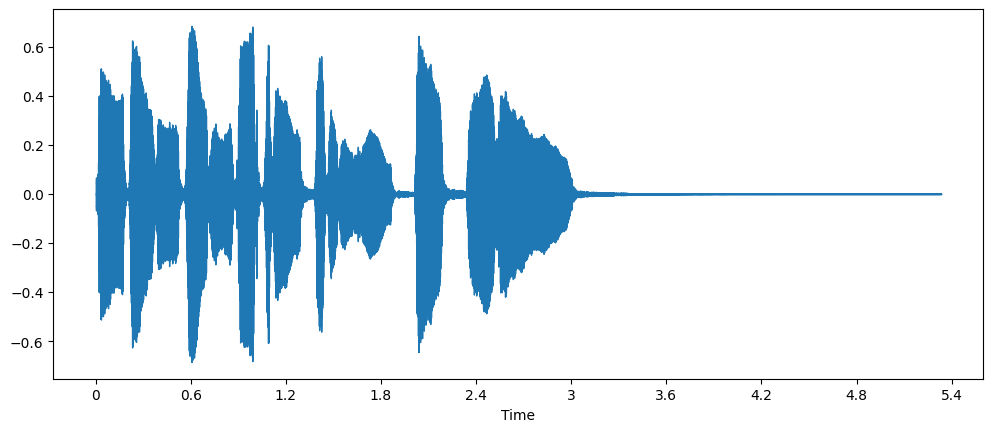

In [3]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

This plots the amplitude of the signal on the y-axis and time along the x-axis. In other words, each point corresponds to a single sample value that was taken when this sound was sampled. Also note that librosa returns the audio as floating-point values already, and that the amplitude values are indeed within the [-1.0, 1.0] range.

# The frequency spectrum

Another way to visualize audio data is to plot the `frequency spectrum` of an audio signal, also known as the `frequency domain` representation. The spectrum is computed using the discrete Fourier transform or DFT. It describes the individual frequencies that make up the signal and how strong they are.

Here, we are going to plot the frequency spectrum for the same trumpet sound by taking the DFT using numpy's `rfft()` function. While it is possible to plot the spectrum of the entire sound, it's more useful to look at a small region instead. Here we will take the DFT over the first 4096 samples, which is roughly the length of the first note being played:

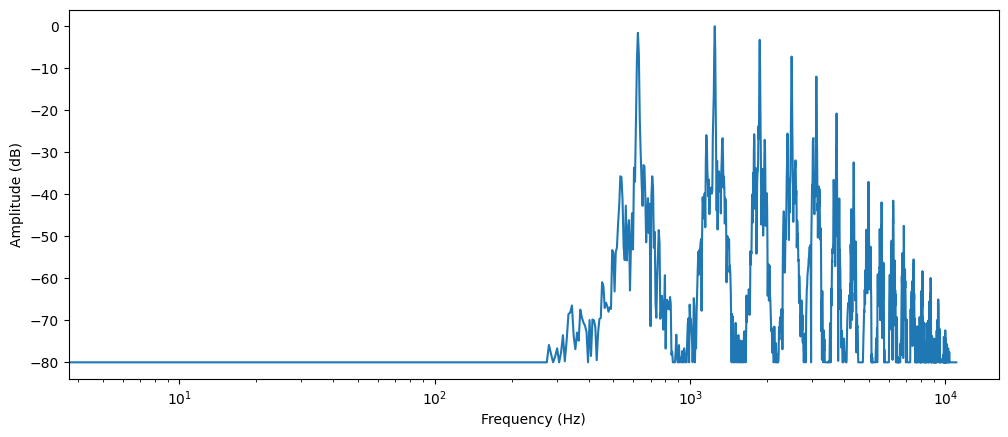

In [4]:
import numpy as np

dft_input=array[:4096]

# calculate the DFT
window =np.hanning(len(dft_input))
windowed_input=dft_input*window
dft=np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude=np.abs(dft)
amplitude_db=librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency=librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.xscale('log')

This plots the strength of the various frequency components that are present in this audio segment. The frequency values are on the x-axis, usually plotted on a logarithmic scale, while their amplitudes are on the y-axis. The frequency spectrum that we plotted shows several peaks. These speaks correspond to the harmonics of the note that's being played, with the higher harmoics being quieter. 

# Spectrogram
